In [44]:
# libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import silhouette_score
from sklearn.metrics import r2_score

In [2]:
# load in data
df1 = pd.read_csv('QBStats_2014.csv')
df2 = pd.read_csv('QBStats_2015.csv')

In [3]:
df = pd.concat([df1, df2])

In [4]:
# select columns to keep
df = df.iloc[:, :-4]

In [5]:
# set quarterback names as the index
df.set_index('qb', inplace=True)

In [6]:
# feature engineer accuracy
df['accuracy'] = df['cmp'] / df['att']

In [7]:
# reorder columns w/ target variable "td" at the back
columns = list(df.columns)
new_order = [col for col in columns if col != 'td'] + ['td']
df = df[new_order]

In [8]:
# check for NA values - there are none
missing_values = df.isna().sum()
print(missing_values)

att         0
cmp         0
yds         0
ypa         0
int         0
lg          0
sack        0
loss        0
accuracy    6
td          0
dtype: int64


In [9]:
# fix lg column
df['lg'] = df['lg'].str.replace('t', '').astype(float)

**EDA**

In [10]:
# summary statistics
df.describe()

,att,cmp,yds,ypa,int,lg,sack,loss,accuracy,td
count,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1202.000000,1208.000000
mean,29.947848,18.813742,216.545530,7.282616,0.733444,36.510762,1.985927,12.834437,0.620917,1.365066
std,13.544052,8.881858,104.846033,3.600773,0.888185,18.014582,1.750550,12.792036,0.166400,1.202733
min,0.000000,0.000000,-3.000000,-3.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,15.000000,162.750000,5.800000,0.000000,25.000000,1.000000,1.000000,0.555556,0.000000
50%,32.000000,20.000000,230.500000,7.100000,0.000000,35.000000,2.000000,10.000000,0.630032,1.000000
75%,39.000000,24.000000,291.000000,8.400000,1.000000,47.000000,3.000000,19.000000,0.700000,2.000000
max,65.000000,43.000000,522.000000,50.000000,5.000000,94.000000,10.000000,91.000000,1.000000,7.000000


<Axes: xlabel='td', ylabel='count'>

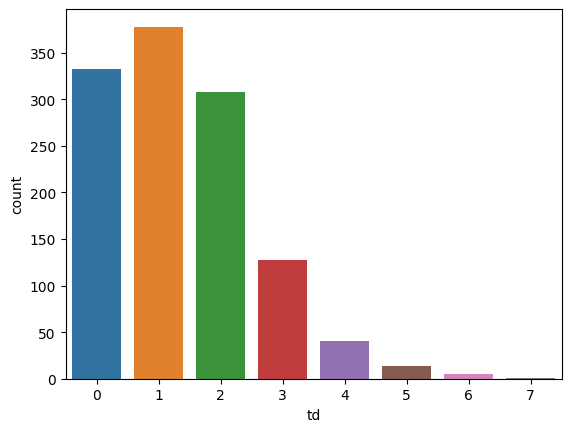

In [11]:
# plot of touchdowns
sns.countplot(x='td', data=df)

<Axes: >

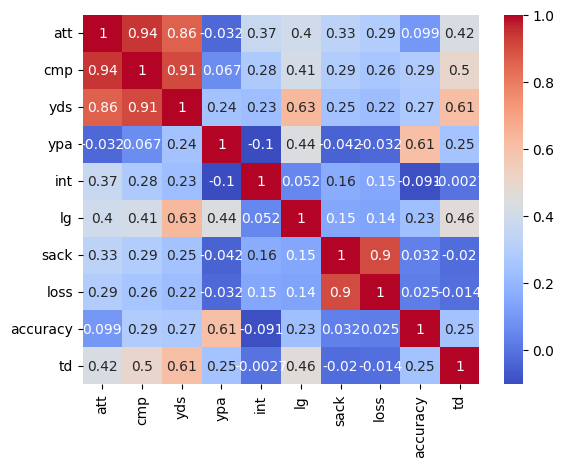

In [12]:
# heatmap to analyze correlation between variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
# save cleaned dataframe
df.to_csv('quarterbacks.csv', index=True)

**Models**

In [13]:
# K means
selected_columns = ['att', 'cmp', 'yds', 'ypa', 'int', 'lg', 'sack', 'loss', 'accuracy', 'td']
data_for_clustering = df[selected_columns]

In [15]:
df_cleaned = data_for_clustering.dropna()

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

In [40]:
kmeans = KMeans(n_clusters=3)

In [41]:
kmeans.fit(df_cleaned)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [42]:
cluster_labels = kmeans.labels_

In [21]:
df_cleaned['Cluster'] = cluster_labels

<ipython-input-21-fbf865a2c4cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = cluster_labels


In [43]:
# silhouette score
silhouette_score(df_cleaned, cluster_labels)

0.5081872582770982

In [23]:
# avg num of touchdowns
df_cleaned[df_cleaned['Cluster'] == 0]

,att,cmp,yds,ypa,int,lg,sack,loss,accuracy,td,Cluster
qb,,,,,,,,,,,
Aaron RodgersA. Rodgers,33,23,189,5.7,1,23.0,3,14,0.696970,1,0
Russell WilsonR. Wilson,28,19,191,6.8,0,33.0,1,0,0.678571,2,0
Matt CasselM. Cassel,25,17,170,6.8,0,22.0,0,0,0.680000,2,0
Austin DavisA. Davis,23,16,192,8.3,1,28.0,4,21,0.695652,0,0
Brian HoyerB. Hoyer,30,18,222,7.4,0,47.0,3,24,0.600000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
Philip RiversP. Rivers,35,21,228,6.5,1,80.0,3,21,0.600000,2,0
Brock OsweilerB. Osweiler,22,14,232,10.5,2,72.0,1,8,0.636364,1,0
Russell WilsonR. Wilson,28,19,197,7.0,0,36.0,1,16,0.678571,3,0


In [24]:
# lots of touchdowns
df_cleaned[df_cleaned['Cluster'] == 1]

,att,cmp,yds,ypa,int,lg,sack,loss,accuracy,td,Cluster
qb,,,,,,,,,,,
Shaun HillS. Hill,13,8,81,6.2,1,23.0,1,6,0.615385,0,1
Robert GoldenR. Golden,1,1,25,25.0,0,25.0,0,0,1.000000,0,1
Michael VickM. Vick,1,0,0,0.0,0,0.0,0,0,0.000000,0,1
Robert Griffin IIIR. Griffin,3,2,38,12.7,0,19.0,1,9,0.666667,0,1
Johnny ManzielJ. Manziel,1,0,0,0.0,0,0.0,0,0,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
Teddy BridgewaterT. Bridgewater,19,10,99,5.2,1,22.0,3,8,0.526316,0,1
Peyton ManningP. Manning,9,5,69,7.7,0,18.0,1,0,0.555556,0,1
Tarvaris JacksonT. Jackson,4,3,28,7.0,0,17.0,0,0,0.750000,0,1


In [25]:
# no touchdowns
df_cleaned[df_cleaned['Cluster'] == 2]

,att,cmp,yds,ypa,int,lg,sack,loss,accuracy,td,Cluster
qb,,,,,,,,,,,
Drew BreesD. Brees,42,29,333,7.9,1,57.0,0,0,0.690476,1,2
Matt RyanM. Ryan,43,31,448,10.4,0,54.0,1,3,0.720930,3,2
Ben RoethlisbergerB. Roethlisberger,34,23,365,10.7,1,41.0,3,14,0.676471,1,2
Chad HenneC. Henne,43,24,266,6.2,0,46.0,3,24,0.558140,2,2
Nick FolesN. Foles,45,27,322,7.2,1,68.0,5,47,0.600000,2,2
...,...,...,...,...,...,...,...,...,...,...,...
Sam BradfordS. Bradford,38,30,320,8.4,1,60.0,1,5,0.789474,2,2
Eli ManningE. Manning,43,24,302,7.0,0,45.0,2,8,0.558140,2,2
Matthew StaffordM. Stafford,39,28,298,7.6,0,36.0,4,16,0.717949,3,2


In [26]:
# Random Forest
features = ['att', 'cmp', 'ypa', 'int', 'lg', 'sack', 'loss', 'accuracy', 'yds']
target = 'td'

In [27]:
X = df_cleaned[features]
y = df_cleaned[target]

In [28]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [29]:
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [30]:
feature_importances = rf.feature_importances_

In [31]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [32]:
print(importance_df)

    Feature  Importance
8       yds    0.444500
2       ypa    0.121981
7  accuracy    0.110122
4        lg    0.090975
6      loss    0.072422
1       cmp    0.052426
0       att    0.046683
5      sack    0.035480
3       int    0.025411


In [45]:
# predictions
predictions = rf.predict(X)

In [46]:
# r-squared
r2_score(y, predictions)

0.912782902506138